In [23]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from keras.optimizers import Adam,RMSprop
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [24]:
train_path="train.csv"
test_path="test.csv"

In [25]:


train=pd.read_csv(train_path)
print(train.shape)
test = pd.read_csv(test_path)
print(test.shape)

(42000, 785)
(28000, 784)


In [26]:
Y_train=train["label"]
X_train=train.drop(labels=["label"],axis=1)

<bound method IndexOpsMixin.value_counts of 0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64>

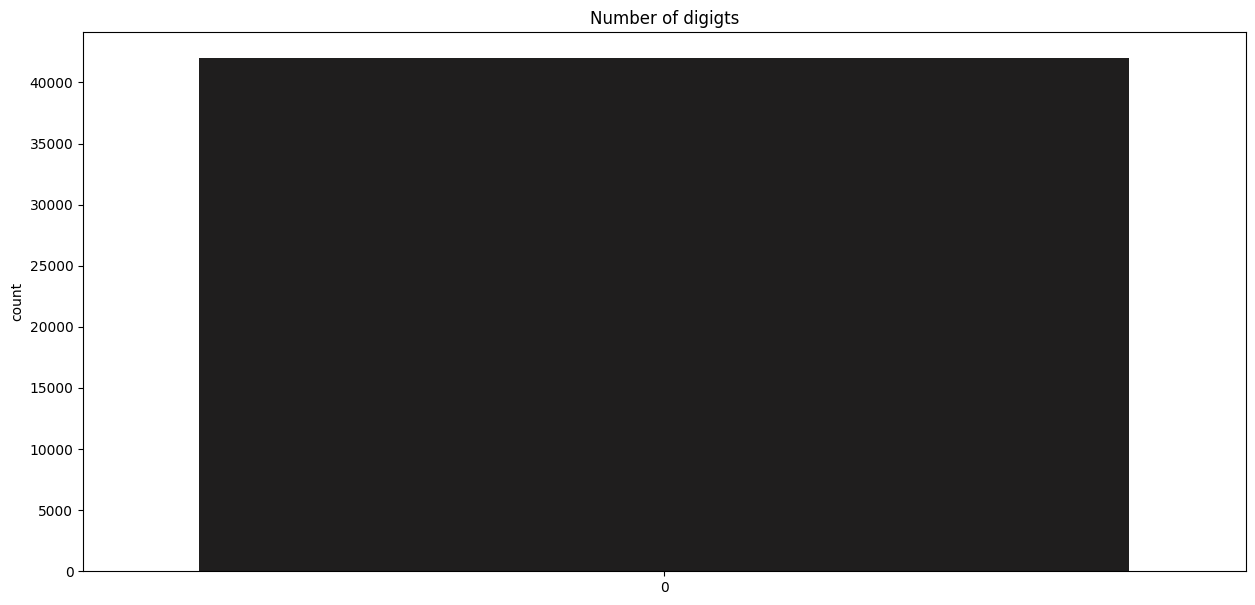

In [27]:
plt.figure(figsize=(15,7))
g=sns.countplot(Y_train,palette="icefire")
plt.title("Number of digigts")
Y_train.value_counts

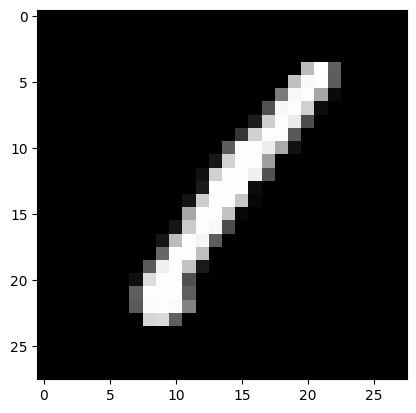

In [28]:
img = X_train.iloc[0].values
img=img.reshape((28,28))
plt.imshow(img,cmap="gray")

# Normalization

In [29]:
X_train=X_train/255.0
test=test/255.0
# zero - one range
print("X train shape ",X_train.shape)

X train shape  (42000, 784)


In [30]:
X_train=X_train.values.reshape(-1,28,28,1)
test= test.values.reshape(-1,28,28,1)

print("X train shape ",X_train.shape)

X train shape  (42000, 28, 28, 1)


In [31]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(Y_train,num_classes=10)

# Train test Split

In [32]:
from sklearn.model_selection import train_test_split

X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.1,random_state=42)

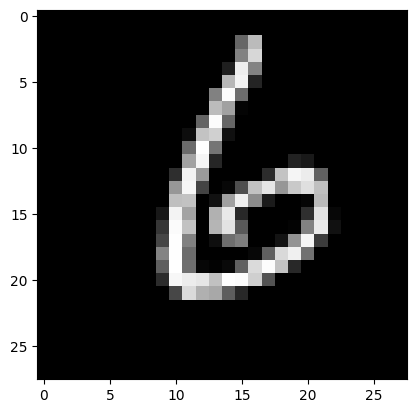

In [33]:
plt.imshow(X_train[2],cmap="gray")
plt.show()

In [34]:

model=Sequential()

model = Sequential()
model.add(Conv2D(input_shape=(28,28,1),filters=8,kernel_size=(5,5),padding='Same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=16,kernel_size=(5,5),padding='Same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation="softmax"))



In [22]:
optimizar=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)
print(optimizar)

In [35]:
model.compile(loss="categorical_crossentropy",optimizer=optimizar,metrics=["accuracy"])



In [36]:
epochs=3 # for better result , increase epoch
batch_size=250 # if 1000  image 1000/250 =4 every batch 4 batches ,for every epoch you have 4 iteration per epoch

In [37]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(featurewise_center=False)

datagen.fit(X_train)

In [38]:
hist=model.fit(datagen.flow(X_train,Y_train,batch_size=batch_size),validation_data=(X_val,Y_val),epochs=epochs)

Epoch 1/3
152/152 [==============================] - 10s 64ms/step - loss: 0.4697 - accuracy: 0.8543 - val_loss: 1.4992 - val_accuracy: 0.3738
Epoch 2/3
152/152 [==============================] - 9s 56ms/step - loss: 0.1537 - accuracy: 0.9508 - val_loss: 0.4045 - val_accuracy: 0.8548
Epoch 3/3
152/152 [==============================] - 9s 62ms/step - loss: 0.1109 - accuracy: 0.9647 - val_loss: 0.1010 - val_accuracy: 0.9700


In [39]:
from sklearn.metrics import confusion_matrix
Y_pred=model.predict(X_val)
Y_pred_classes=np.argmax(Y_pred,axis=1)
Y_true=np.argmax(Y_val,axis=1)
confusion_matrix=confusion_matrix(Y_true,Y_pred_classes)

132/132 [==============================] - 0s 3ms/step


In [41]:
print(confusion_matrix)

[[403   0   0   0   0   1   2   1   0   1]
 [  0 471   0   0   0   0   0   0   0   0]
 [  1  10 387   4   5   0   1   8   2   2]
 [  1   0   0 495   0   3   0   4   0   3]
 [  0   2   0   0 383   0   4   1   0   7]
 [  1   0   0   2   0 333   1   1   0   1]
 [  1   0   0   0   0   1 400   0   0   0]
 [  0   3   0   0   1   0   0 429   0   5]
 [  2   9   1   3   1   8   4   2 364   9]
 [  0   0   1   3   0   1   0   2   0 409]]


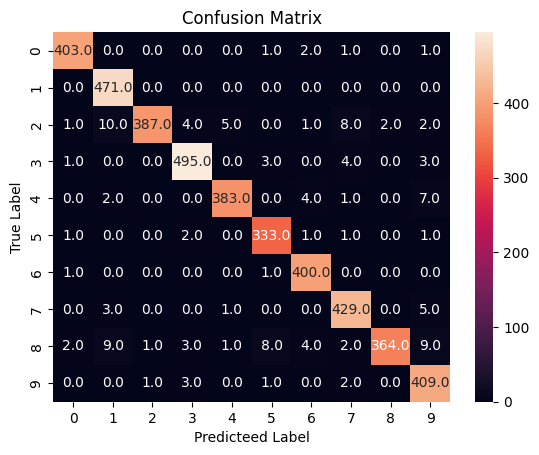

In [43]:
import seaborn as sns

g=sns.heatmap(confusion_matrix,annot=True,fmt=".1f")
plt.xlabel("Predicteed Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
model.save_weights("cnn_mnist_model.h5")

In [ ]:
import json
with open("cnn_mnist_model_hist.json","w") as f:
    json.dump(hist.history,f)